In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# !open 2013_movies.csv

In [4]:
dataset = '2013_movies.csv'
datasetscrape = "scrapeddata2005.csv"
scraped_data = pd.read_csv(datasetscrape)
movie_data = pd.read_csv(dataset)

## Exercise 2.1

Plot domestic total gross over time.

In [35]:
movie_data = movie_data.dropna()

In [36]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Date
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,2013-06-14


In [37]:
movie_data['Date'] = pd.to_datetime(movie_data['ReleaseDate'])

/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
# movie_data.head()

In [39]:
# movie_data.DomesticTotalGross.values
time = np.array(movie_data.Date)
gross = np.array(movie_data.DomesticTotalGross)

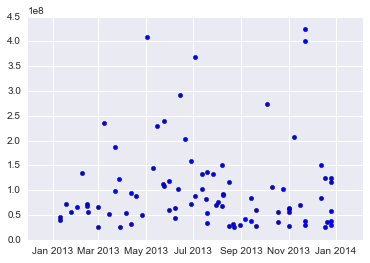

In [40]:
plt.scatter(time,gross)
plt.show()

# movie_data.plot.scatter(movie_data['DomesticTotalGross'],movie_data['ReleaseDate'])

## Exercise 2.2

Plot runtime vs. domestic total gross

In [41]:
movie_data.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate', u'Date'],
      dtype='object')

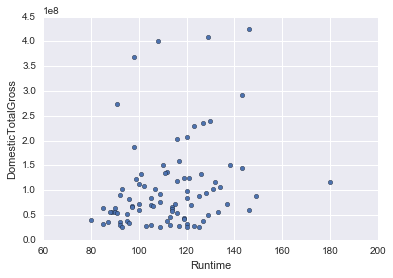

In [42]:
movie_data.plot.scatter(x='Runtime', y='DomesticTotalGross')

## Exercise 2.3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [43]:
movie_data.groupby(['Rating','Runtime','DomesticTotalGross']).mean()
movie_data.groupby(['Rating']).mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
PG,9.507143e+07,1.319459e+08,100.285714
PG-13,9.877500e+07,1.177266e+08,117.350000
R,3.886364e+07,7.422795e+07,111.939394


## Exercise 2.4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



In [44]:
movie_data.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate', u'Date'],
      dtype='object')

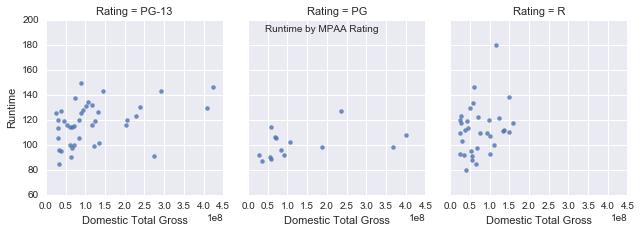

In [45]:
# movie_data_G = movie_data.loc[movie_data.Rating == 'G']
movie_data_PG = movie_data.loc[movie_data.Rating == 'PG']
movie_data_PG13 = movie_data.loc[movie_data.Rating == 'PG-13']
movie_data_R = movie_data.loc[movie_data.Rating == 'R']

# plt.figure(figsize=(25,5))
# plt.subplot(131)
# plt.title('PG Movies')
# plt.xlabel('Budget')
# plt.ylabel('Domestic Total Gross')
# plt.regplot(movie_data_PG.ReleaseDate, movie_data_PG.DomesticTotalGross, scatter = True)
# x = movie_data_PG.ReleaseDate
# y = movie_data_PG.DomesticTotalGross

# # plt.scatter(x, y, alpha=0.5)
# # plt.show()


# # ax = movie_data_PG.plot.scatter(x='ReleaseDate', y='DomesticTotalGross', color='DarkBlue', label='Group 1');

# # movie_data_PG.plot.scatter(x='ReleaseDate', y='DomesticTotalGross', color='DarkGreen', label='Group 2', ax=ax);
# ax = sns.regplot(x=x, y=y, color="g")


import seaborn as sns

grid_plot = sns.FacetGrid(movie_data, col='Rating')
grid_plot.map(sns.regplot, 'DomesticTotalGross', 'Runtime', fit_reg=False)
grid_plot.set_xlabels('Domestic Total Gross')
plt.subplots_adjust(top=1)
grid_plot.fig.suptitle('Runtime by MPAA Rating');

In [46]:
movie_data_PG.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Date
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,2013-07-03
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00,2013-03-08
13,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,3/22/13 0:00,2013-03-22
30,Epic,100000000.0,107518682,Chris Wedge,PG,102,5/24/13 0:00,2013-05-24


## Exercise 2.5

What director in your dataset has the highest gross per movie?

In [121]:
movie_data.groupby(['Director']).mean().sort_values('DomesticTotalGross', ascending = False).head(1)

,Budget,DomesticTotalGross,Runtime,Month
Director,,,,
Francis Lawrence,130000000.0,424668047.0,146.0,11.0


In [38]:
grouped = movie_data.groupby('Director')

In [40]:
grouped['DomesticTotalGross'].mean().sort_values()

Director
Spike Jonze                    25568251
Jon LucasScott Moore           25682380
Edgar Wright                   26004851
Andrew Niccol                  26627201
Ron Howard                     26947624
Jean-Marc Vallee               27298285
Jeff Wadlow                    28795985
Morgan Spurlock                28873374
Peter Segal                    29807260
Ken Scott                      30664106
Harald Zwart                   31165421
Steven Soderbergh              32172757
Woody Allen                    33405481
Robert Schwentke               33618855
John Luessenhop                34341945
Kimberly Peirce                35266619
Barry CookNeil Nightingale     36076121
Luc Besson                     36918811
Stephen Frears                 37709979
John Wells                     37738810
Carl Rinsch                    38362475
Michael Tiddes                 40041683
David Twohy                    42025135
Ric Roman Waugh                42930462
Shawn Levy                     

## Exercise 2.6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [124]:
# movie_data.rename(index=lambda x: x.strftime('%B'))
import calendar

# movie_data['Month'] = movie_data['Date'].apply(lambda x: calendar.month_abbr[x])
# d = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d')
# d.strftime('%B')

# time = movie_data['Date'][0]

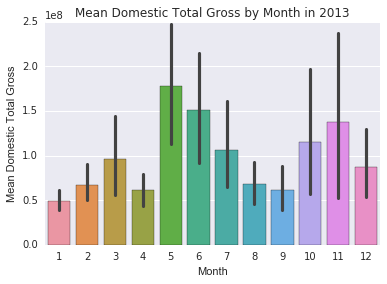

In [130]:
movie_data['Month'] = movie_data['Date'].apply(lambda x: pd.to_datetime(x).month)
ax = sns.barplot(x='Month', y='DomesticTotalGross', data=movie_data, estimator=mean)
ax.set(xlabel='Month', ylabel='Mean Domestic Total Gross')
ax.set_title('Mean Domestic Total Gross by Month in 2013')

# ReleaseMonth = df.ReleaseDate.apply(lambda x:pd.to_datetime(x).month)
# ReleaseMonth.name = "ReleaseMonth"
# dfnew = pd.concat([df,ReleaseMonth],axis=1)
# ax = plt.axes()
# sb.barplot(x=dfnew['ReleaseMonth'].sort_values(), y=dfnew['DomesticTotalGross'])
# ax.set_title('Mean Domestic Total Gross by Month in 2013')

In [126]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Date,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,2013-11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,2013-05-03,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,2013-11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,2013-07-03,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,2013-06-14,6
